# Analyzing Sales Data

---



### Step 1: Import Necessary Libraries
We begin by importing the necessary Python libraries for data manipulation and visualization.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

### Step 2: Load and Inspect the Data
Next, we load the `Features`, `Sales`, and `Stores` datasets and inspect the first few rows to understand the structure of the data.

In [2]:
# Load the datasets
features_df = pd.read_csv('Features data set.csv')
sales_df = pd.read_csv('sales data-set.csv')
stores_df = pd.read_csv('stores data-set.csv')

# Display first few rows of each dataset
print(features_df.head(), sales_df.head(), stores_df.head())
# Display n=10 random rows of each dataset
features_df.sample(n=10), sales_df.sample(n=10), stores_df.sample(n=10)

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False      Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/201

(      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
 5699     32  11/03/2011        36.51       3.372        NaN        NaN   
 3543     20  23/09/2011        62.15       3.711        NaN        NaN   
 3144     18  21/01/2011        22.55       3.232        NaN        NaN   
 6125     34  18/05/2012        64.97       3.620    2328.53        NaN   
 549       4  26/02/2010        41.36       2.590        NaN        NaN   
 4077     23  01/07/2011        65.65       3.815        NaN        NaN   
 31        1  10/09/2010        78.69       2.565        NaN        NaN   
 1712     10  08/07/2011        88.57       3.793        NaN        NaN   
 5667     32  30/07/2010        75.62       2.690        NaN        NaN   
 818       5  28/10/2011        69.27       3.372        NaN        NaN   
 
       MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
 5699        NaN        NaN        NaN  192.058484         8.818      False  
 3543        NaN 

### Step 3: Data Cleaning
We will check for missing data in the datasets and apply cleaning procedures. For instance, we will fill missing markdown values with 0 and forward-fill missing economic indicators like CPI and unemployment.

In [3]:
# Checking for missing data in all datasets
print("Features dataset missing values:")
print(features_df.isnull().sum())
print("\nSales dataset missing values:")
print(sales_df.isnull().sum())
print("\nStores dataset missing values:")
print(stores_df.isnull().sum())

# Handle missing values
# Fill missing markdown values with 0
features_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = features_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)

# Forward fill missing CPI and Unemployment data without inplace parameter to avoid warnings
features_df['CPI'] = features_df['CPI'].ffill()
features_df['Unemployment'] = features_df['Unemployment'].ffill()

# Convert 'Date' columns to datetime format in both features and sales datasets
features_df['Date'] = pd.to_datetime(features_df['Date'], format='%d/%m/%Y')
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format='%d/%m/%Y')


Features dataset missing values:
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Sales dataset missing values:
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Stores dataset missing values:
Store    0
Type     0
Size     0
dtype: int64


### Step 4: Merge the Datasets
We merge the `Sales`, `Features`, and `Stores` datasets on the common columns: `Store`, `Date`, and `IsHoliday`. This combined dataset will allow us to perform our analysis across multiple variables.

In [4]:
# Merge the datasets
merged_df = pd.merge(sales_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
merged_df = pd.merge(merged_df, stores_df, on='Store', how='left')

# Display first few rows of the merged dataset
merged_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


### Step 5: Exploratory Data Analysis (EDA)
We will now perform exploratory data analysis to identify sales trends, compare holiday vs. non-holiday sales, and analyze the impact of markdowns on sales performance.

  ### **1. Total sales over time**


Date with the Highest Sales: 2010-12-24T00:00:00.000000000
Highest Total Weekly Sales: $80931415.60


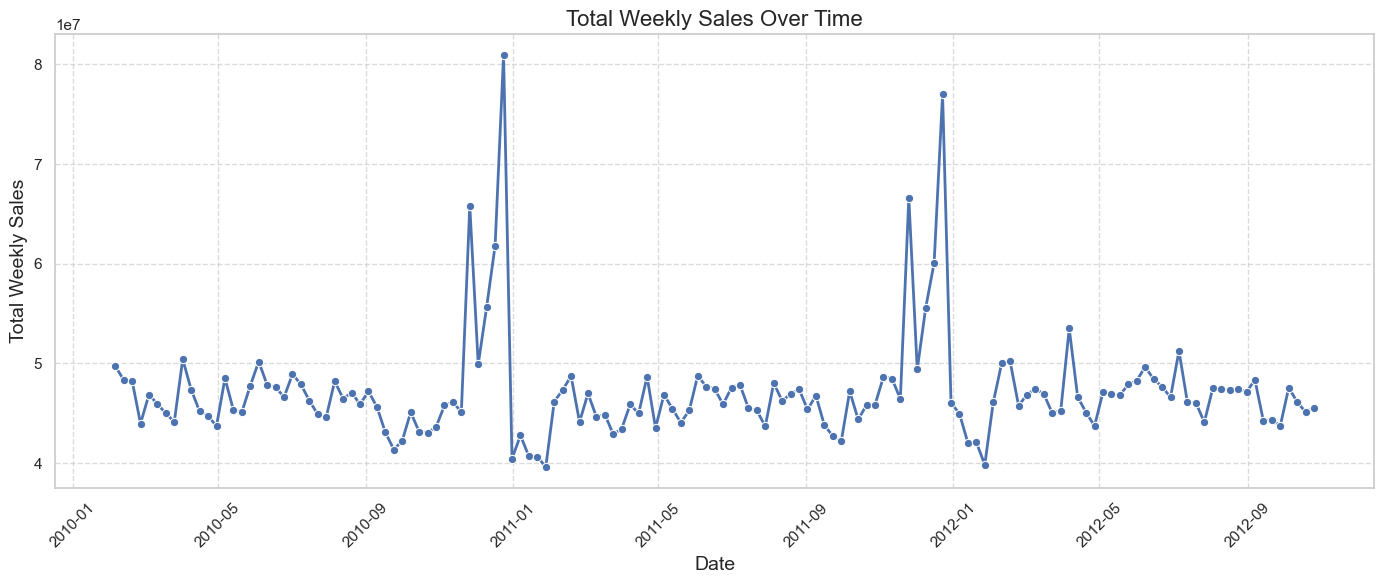

In [5]:
weekly_sales = merged_df.groupby('Date')['Weekly_Sales'].sum().reset_index()

max_sales = weekly_sales['Weekly_Sales'].max()
highest_sales_date = weekly_sales[weekly_sales['Weekly_Sales'] == max_sales]

print(f"Date with the Highest Sales: {highest_sales_date['Date'].values[0]}")
print(f"Highest Total Weekly Sales: ${max_sales:.2f}")

plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=weekly_sales, marker='o', color='b', linewidth=2)

plt.title('Total Weekly Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Weekly Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


  ### **2. Holiday vs Non-Holiday Sales**


Average Weekly Sales on Holidays: $17,035.82
Average Weekly Sales on Non-Holidays: $15,901.45
Percentage Increase in Sales During Holidays: 7.13%


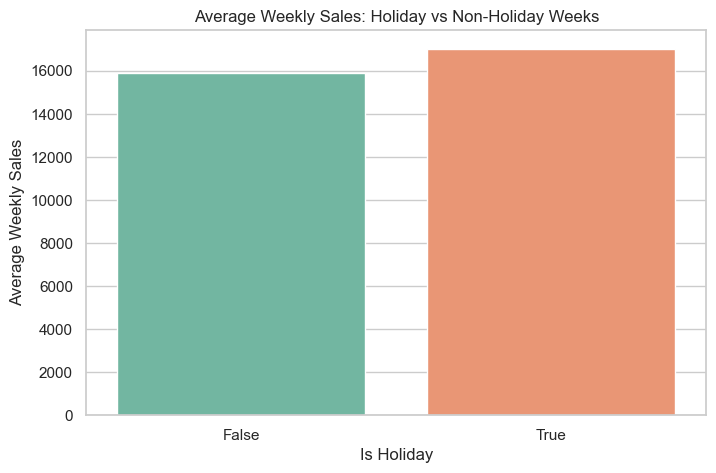

In [6]:
# Group by IsHoliday to calculate average weekly sales
holiday_sales = merged_df.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()

# Calculate average sales for holiday and non-holiday
avg_holiday_sales = holiday_sales.loc[holiday_sales['IsHoliday'] == 1, 'Weekly_Sales'].values[0]
avg_non_holiday_sales = holiday_sales.loc[holiday_sales['IsHoliday'] == 0, 'Weekly_Sales'].values[0]

# Calculate percentage difference
percentage_difference = ((avg_holiday_sales - avg_non_holiday_sales) / avg_non_holiday_sales) * 100

# Print the results
print(f"Average Weekly Sales on Holidays: ${avg_holiday_sales:,.2f}")
print(f"Average Weekly Sales on Non-Holidays: ${avg_non_holiday_sales:,.2f}")
print(f"Percentage Increase in Sales During Holidays: {percentage_difference:.2f}%")

# Plot average sales during holiday vs non-holiday weeks
plt.figure(figsize=(8, 5))
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=holiday_sales, hue='IsHoliday', palette="Set2",legend=False)
plt.title('Average Weekly Sales: Holiday vs Non-Holiday Weeks')
plt.xlabel('Is Holiday')
plt.ylabel('Average Weekly Sales')
plt.show()


### Step 6: Analyze the Impact of Markdowns and External Factors
Next, we will analyze how promotional markdowns and external factors like temperature and fuel prices impact weekly sales.

  ### **3. Impact of Markdown on Sales**


Average Weekly Sales with Markdowns: $16177.02
Average Weekly Sales without Markdowns: $15871.52
Percentage Increase in Sales due to Markdowns: 1.92%


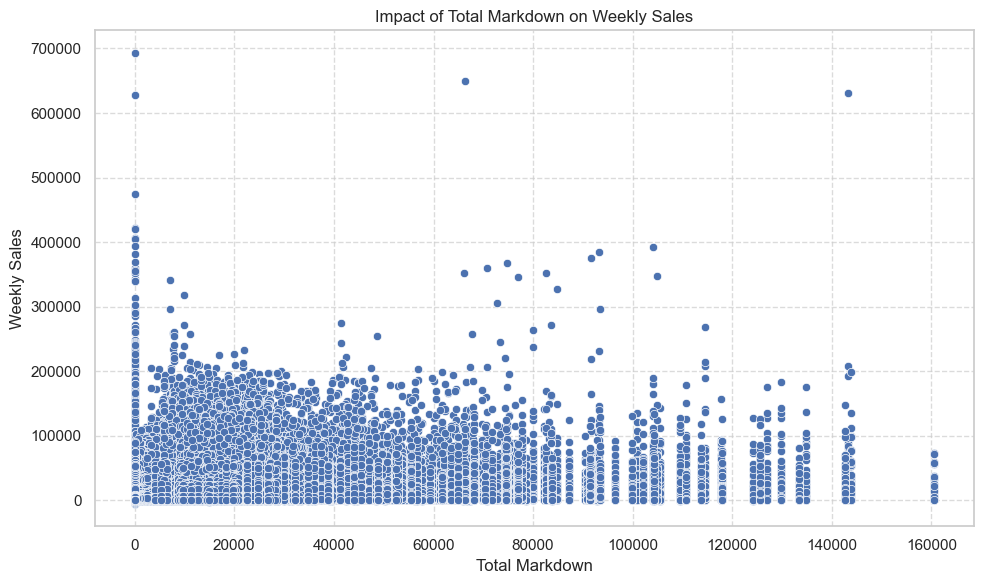

In [7]:
# Combine all markdown columns into a single column first
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
merged_df['Total_MarkDown'] = merged_df[markdown_cols].sum(axis=1)

# Calculate average weekly sales for weeks with and without markdowns
sales_with_markdown = merged_df[merged_df['Total_MarkDown'] > 0]['Weekly_Sales'].mean()
sales_without_markdown = merged_df[merged_df['Total_MarkDown'] == 0]['Weekly_Sales'].mean()

# Calculate the percentage increase in sales due to markdowns
markdown_impact_percentage = ((sales_with_markdown - sales_without_markdown) / sales_without_markdown) * 100

# Print the results
print(f"Average Weekly Sales with Markdowns: ${sales_with_markdown:.2f}")
print(f"Average Weekly Sales without Markdowns: ${sales_without_markdown:.2f}")
print(f"Percentage Increase in Sales due to Markdowns: {markdown_impact_percentage:.2f}%")

# Plot the relationship between markdowns and sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_MarkDown', y='Weekly_Sales', data=merged_df)
plt.title('Impact of Total Markdown on Weekly Sales')
plt.xlabel('Total Markdown')
plt.ylabel('Weekly Sales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


  ### **4. Impact of external factors on sales (Temperature, Fuel Price)**


**1. Sales vs. Temperature (Binned)**

Temperature Range with the Highest Sales: Moderate
Highest Average Weekly Sales: $16247.50


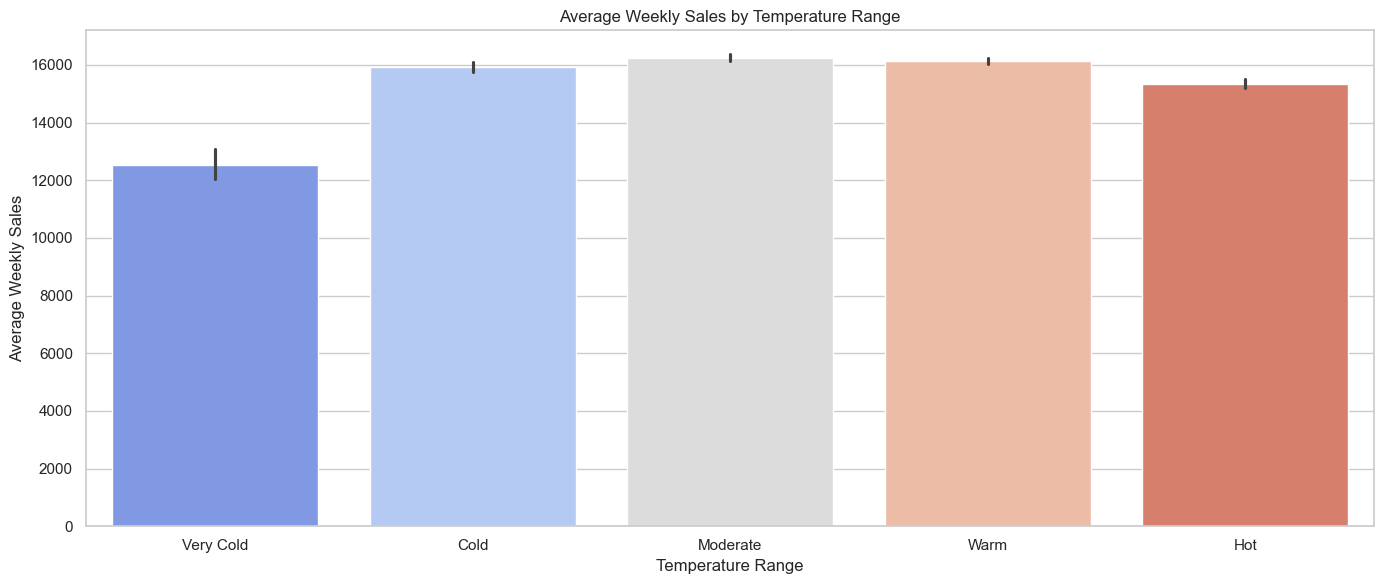

In [8]:
# Bin temperature into categories first
merged_df['Temp_Binned'] = pd.cut(merged_df['Temperature'], bins=5, labels=['Very Cold', 'Cold', 'Moderate', 'Warm', 'Hot'])

# Calculate average weekly sales for each temperature range
temp_sales = merged_df.groupby('Temp_Binned', observed=False)['Weekly_Sales'].mean().reset_index()

# Find the temperature range with the highest sales
max_sales_temp = temp_sales['Weekly_Sales'].max()
highest_temp_range = temp_sales[temp_sales['Weekly_Sales'] == max_sales_temp]

# Print the temperature range with the highest sales
print(f"Temperature Range with the Highest Sales: {highest_temp_range['Temp_Binned'].values[0]}")
print(f"Highest Average Weekly Sales: ${max_sales_temp:.2f}")

# Plot average sales by temperature bins
plt.figure(figsize=(14, 6))
sns.barplot(x='Temp_Binned', y='Weekly_Sales', data=merged_df, hue='Temp_Binned', palette='coolwarm', legend=False)
plt.title('Average Weekly Sales by Temperature Range')
plt.xlabel('Temperature Range')
plt.ylabel('Average Weekly Sales')
plt.tight_layout()
plt.show()


 **2. Sales vs. Fuel Price (Binned)**

Fuel Price Range with the Highest Sales: Low
Highest Average Weekly Sales: $16854.42


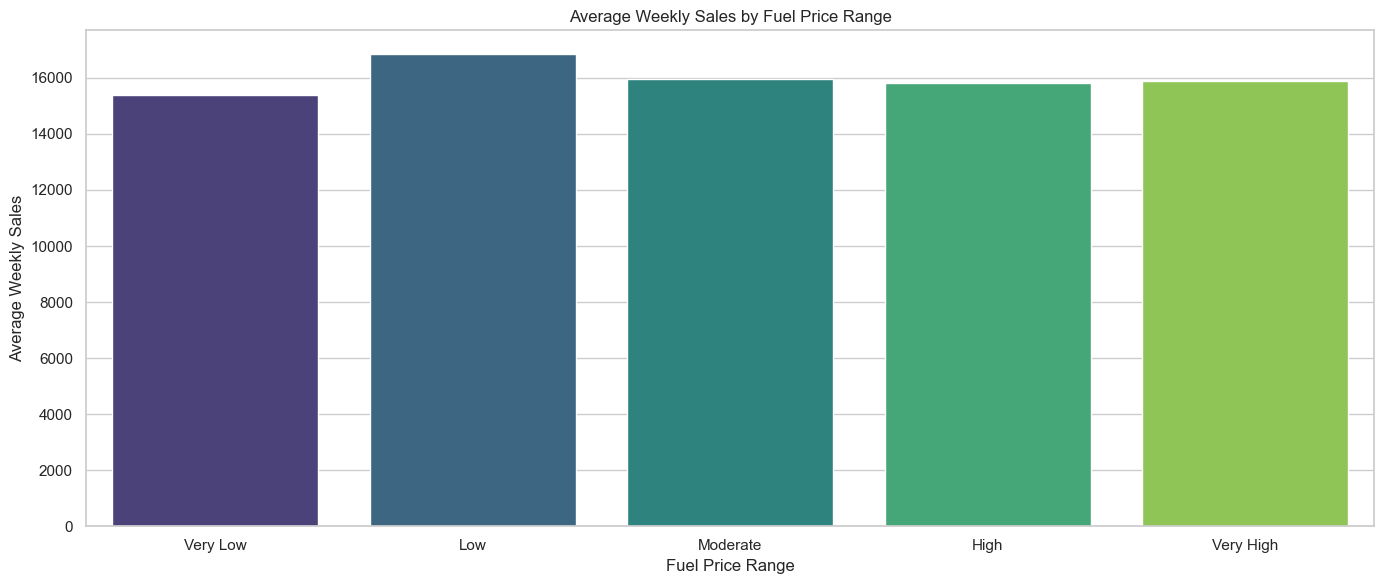

In [9]:
# Step 1: Bin fuel prices into quantiles (equal number of data points)
merged_df['Fuel_Binned'] = pd.qcut(
    merged_df['Fuel_Price'],
    q=5,
    labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High']
)

# Step 2: Calculate average weekly sales per bin
fuel_sales = (
    merged_df
    .groupby('Fuel_Binned', observed=False)['Weekly_Sales']
    .mean()
    .reset_index()
)

# Step 3: Find the bin with the highest average sales
max_sales = fuel_sales['Weekly_Sales'].max()
highest_fuel_range = fuel_sales.loc[fuel_sales['Weekly_Sales'] == max_sales, 'Fuel_Binned'].values[0]

# Print results
print(f"Fuel Price Range with the Highest Sales: {highest_fuel_range}")
print(f"Highest Average Weekly Sales: ${max_sales:.2f}")

# Step 4: Plot from pre-aggregated data with updated Seaborn syntax
fuel_sales['Hue'] = fuel_sales['Fuel_Binned']  # Add dummy hue to satisfy new requirement

plt.figure(figsize=(14, 6))
sns.barplot(
    x='Fuel_Binned',
    y='Weekly_Sales',
    hue='Hue',                  # Required to avoid FutureWarning
    data=fuel_sales,
    palette='viridis',
    legend=False,
    order=['Very Low', 'Low', 'Moderate', 'High', 'Very High']
)

plt.title('Average Weekly Sales by Fuel Price Range')
plt.xlabel('Fuel Price Range')
plt.ylabel('Average Weekly Sales')
plt.tight_layout()
plt.show()




## **Conclusion/FIndings:**

### **Key Findings from Sales Analysis**

1. **Holiday Sales**  
   Sales increase by **7.13%** during holiday periods, indicating a strong seasonal trend.

2. **Promotional Markdowns**  
   Weekly sales rise by **1.92%** during weeks with active promotional markdowns.

3. **Temperature Impact**  
   Highest sales are recorded during **moderate temperature conditions (15°C – 25°C)**.

4. **Fuel Prices**  
   Sales perform best when **fuel prices are low**, particularly below **$2.50 per gallon**.

---

### **Recommendations for Future Sales Strategies**

* **Holiday Planning**  
  Prepare early for holidays and focus on top-performing categories to fully capture the **7.13% sales boost**.

* **Strategic Markdowns**  
  Implement well-timed, data-backed markdowns to take advantage of the **1.92% uplift** in weekly sales.

* **Temperature-Based Marketing**  
  Optimize promotions and store arrangements during moderate weather to align with peak customer activity.

* **Fuel Price Monitoring**  
  Track fuel costs and align campaigns with low-price periods to enhance customer spending potential.

---





